### Import the nessescary libraries

In [2]:
import pandas as pd
import seaborn as sns

### Import the dataset ( data taken from kaggle )

In [3]:
df=pd.read_csv('sms_spam.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### EDA

In [4]:
df.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [5]:
df.columns

Index(['type', 'text'], dtype='object')

In [6]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [7]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [8]:
df.describe(include='all')

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [9]:
df['type'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


### Convert the object datatype into int to process it in ML

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
df['type']=le.fit_transform(df['type'])

In [14]:
df['text']=le.fit_transform(df['text'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   type    5559 non-null   int32
 1   text    5559 non-null   int32
dtypes: int32(2)
memory usage: 43.6 KB


Observe that object datatypes are converted to int datatype

### Data Visualizations

##### Countplot is the plot that explains the unique count of the values for a particular column

C:\Users\Akshatha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

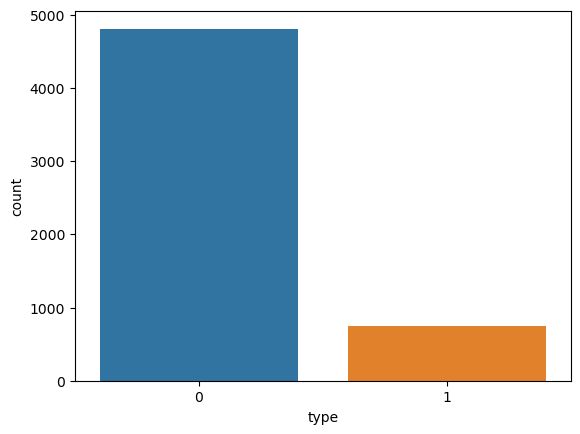

In [16]:
sns.countplot(df['type']).unique()


##### Correlation helps to find the dependancy / relation between two columns . The value of corr() lies from 0 to 1 .
##### 0--> no relation ; 1--> direct relationship

In [17]:
df.corr()

,type,text
type,1.000000,0.025248
text,0.025248,1.000000


##### Heatmap is a visual representation of the correlation between columns . It depends on the intensity of the colour . Darker the colour , more is the corr() value

<AxesSubplot:>

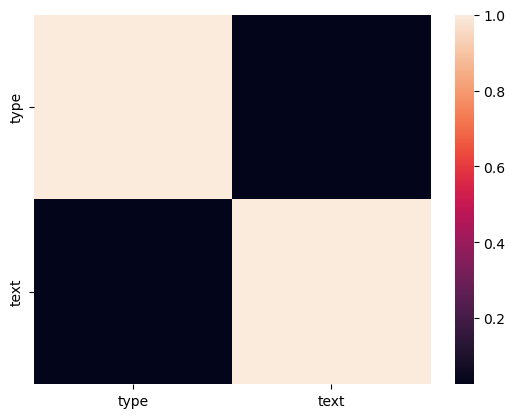

In [18]:
sns.heatmap(df.corr())

##### Barplot explains the comparision between two / more columns ; containers are used to print the values in the barplots 

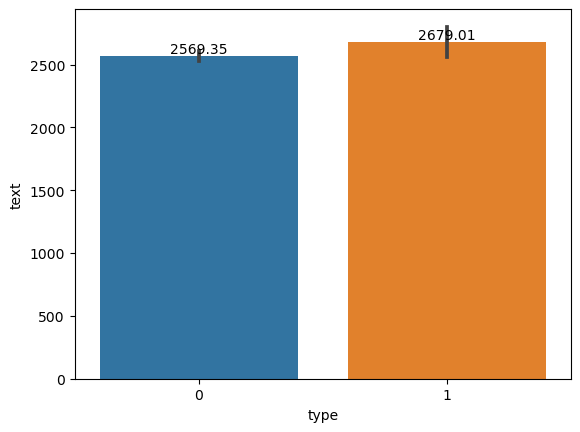

In [19]:
a=sns.barplot(x=df['type'] , y=df['text'])
for ax in a.containers:
    a.bar_label(ax)

##### Pairplot results in a n * n plot where n is the number of columns . Here , there are totally 2 columns . The output is a 2 * 2 = 4 plots . 

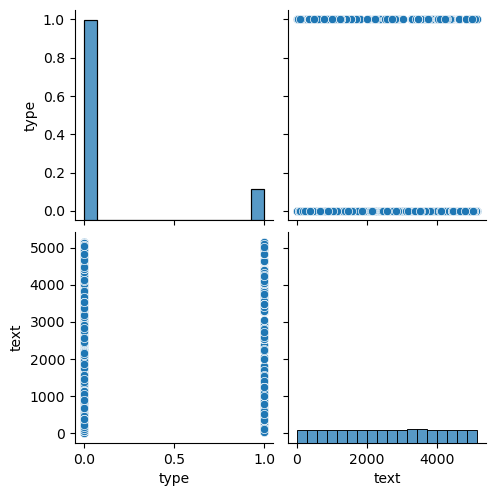

In [20]:
sns.pairplot(df)

### Machine Learning

##### Let's try using various models in the classification to check which one is the best....

#### LR- Logistic Regression

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('sms_spam.csv')

# Preprocessing
data['text'] = data['text'].str.lower()

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('\t\t\t\tLOGISTIC REGRESSION')
print('\n')
print(classification_report(y_test, y_pred))


				LOGISTIC REGRESSION


              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       963
        spam       0.95      0.61      0.74       149

    accuracy                           0.94      1112
   macro avg       0.95      0.80      0.86      1112
weighted avg       0.94      0.94      0.94      1112



#### SVM - Support Vector Machine

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('sms_spam.csv')

# Preprocessing
data['text'] = data['text'].str.lower()

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = SVC(kernel='linear')  # Linear kernel works well for text classification
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('\t\t\tSUPPORT VECTOR MACHINE')
print('\n')
print(classification_report(y_test, y_pred))



			SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       963
        spam       0.96      0.87      0.91       149

    accuracy                           0.98      1112
   macro avg       0.97      0.93      0.95      1112
weighted avg       0.98      0.98      0.98      1112



#### RF- Random Forest

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('sms_spam.csv')

# Preprocessing
data['text'] = data['text'].str.lower()

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('\t\t\t\tRANDOM FOREST')
print('\n')
print(classification_report(y_test, y_pred))


				RANDOM FOREST


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       963
        spam       0.98      0.81      0.89       149

    accuracy                           0.97      1112
   macro avg       0.98      0.90      0.93      1112
weighted avg       0.97      0.97      0.97      1112



#### NB- Naive Bayes

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('sms_spam.csv')

# Preprocessing
data['text'] = data['text'].str.lower()

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('\t\t\t\tNAIVE BAYES')
print('\n')
print(classification_report(y_test, y_pred))


				NAIVE BAYES


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       963
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1112
   macro avg       0.98      0.89      0.93      1112
weighted avg       0.97      0.97      0.97      1112



#### DT-Decision Tree

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('sms_spam.csv')

# Preprocessing
data['text'] = data['text'].str.lower()

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('\t\t\t\tDECISION TREE')
print('\n')
print(classification_report(y_test, y_pred))


				DECISION TREE


              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       963
        spam       0.93      0.83      0.88       149

    accuracy                           0.97      1112
   macro avg       0.95      0.91      0.93      1112
weighted avg       0.97      0.97      0.97      1112



### Conclusion

**ANALYSIS OF THE PERFORMANCE METRICS REPORT**

1. **Logistic Regression**:
   - Accuracy: 0.94
   - F1-score (spam class): 0.74
   - Precision (spam class): 0.95
   - Recall (spam class): 0.61


2. **Support Vector Machine (SVM)**:
   - Accuracy: 0.98
   - F1-score (spam class): 0.91
   - Precision (spam class): 0.96
   - Recall (spam class): 0.87
   

3. **Random Forest**:
   - Accuracy: 0.97
   - F1-score (spam class): 0.89
   - Precision (spam class): 0.98
   - Recall (spam class): 0.81
   

4. **Naive Bayes**:
   - Accuracy: 0.97
   - F1-score (spam class): 0.88
   - Precision (spam class): 1.00
   - Recall (spam class): 0.78
   

5. **Decision Tree**:
   - Accuracy: 0.97
   - F1-score (spam class): 0.88
   - Precision (spam class): 0.93
   - Recall (spam class): 0.83
   

Based on these metrics, the **Support Vector Machine (SVM)** appears to be the best model for this task. It achieves the highest accuracy (0.98) and has the highest F1-score for the spam class (0.91), indicating a good balance between precision and recall. 